# Transfer learning - Survival prediction
Use best epoch and all dataset for training

In [1]:
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/home/shenwanxiang/anaconda3"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import tensorflow as tf
tf.test.is_gpu_available()

tf.config.run_functions_eagerly(True)

tf.__version__
import sys
sys.path.append('../../../codeocean/environment/clinical_transformer/')



2025-08-14 15:24:55.555017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 15:24:55.612528: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-14 15:24:55.958911: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shenwanxiang/anaconda3/lib:
2025-08-14 15:24:55.958943: W tensorflow/compiler/xla/stream_exe

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-08-14 15:24:56.369277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-14 15:24:56.403742: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 15:24:56.420617: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 15:24:56.420704: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [2]:
from xai.models import Trainer
from xai.models import SurvivalTransformer
from xai.models import OptimizedSurvivalDataGenerator as SurvivalDataGenerator
from xai.losses.survival import cIndex_SigmoidApprox as cindex_loss
from xai.metrics.survival import sigmoid_concordance as cindex_metric

In [3]:
import pandas as pd
from samecode.random import set_seed

## Dataset

In [4]:
data = pd.read_csv('./data/dataset-train.data.csv')
features = data.columns[-29:].tolist()
#features
data.shape

(562, 37)

## Parameters

In [5]:
max_features_percentile=100
test_size=0.0 # fraction of samples used for validation
repetitions=10 # number replicates (training / validation) random splits to evaluate variability.

mode='survival'
learning_rate=0.0001
epochs=148
verbose=1
seed=0
embedding_size = 128
num_heads = 2
num_layers = 8

In [6]:
! rm -r ./results/TransferLearningSurvival_all/

/bin/sh: /home/shenwanxiang/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/sh)


## Training

In [7]:
outdir = './results/TransferLearningSurvival_all/'

set_seed(0)

trainer = Trainer(
    from_pretrained='../FoundationModel/fold-0_id-0/model.E002000.h5',
    out_dir = outdir,
    max_features_percentile=max_features_percentile,
    test_size=test_size,
    mode=mode,
    model=SurvivalTransformer, 
    dataloader=SurvivalDataGenerator,
    loss=cindex_loss,
    metrics=[cindex_metric]
)

trainer.setup_data(
    data, 
    discrete_features = [],
    continuous_features = features,
    target=['time', 'event']
)

trainer.setup_model(
    learning_rate=learning_rate,
    embedding_size=embedding_size,
    num_heads=num_heads,
    num_layers=num_layers,
    batch_size_max=True,
    save_best_only=False
)

trainer.fit(repetitions=repetitions, epochs=epochs, verbose=verbose, seed=seed)

/home/shenwanxiang/.local/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO	2025-08-14 15:24:58,140	Setting up working directory: ./results/TransferLearningSurvival_all/
INFO	2025-08-14 15:24:58,149	Setting up transfer learning directory: ./results/TransferLearningSurvival_all//model.E002000.h5/
2025-08-14 15:24:58.152681: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 15:24:58.152823: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-08-14 15:24:58.152881: I tensorflow/compiler

Epoch 1/148


/home/shenwanxiang/anaconda3/envs/IRnet_env/lib/python3.7/site-packages/tensorflow/python/data/ops/structured_function.py:257: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 15:24:59,679	AutoGraph could not transform <function cIndex_SigmoidApprox at 0x7f166c1165f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


WARNING	2025-08-14 15:24:59,891	AutoGraph could not transform <function sigmoid_concordance at 0x7f16d05aea70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 511ms/step - loss: 0.5090 - sigmoid_concordance: 0.4806 - val_loss: 0.4578 - val_sigmoid_concordance: 0.7188
Epoch 2/148
1/1 [==============================] - 0s 281ms/step - loss: 0.4866 - sigmoid_concordance: 0.5322 - val_loss: 0.4216 - val_sigmoid_concordance: 0.7812
Epoch 3/148
1/1 [==============================] - 0s 277ms/step - loss: 0.4651 - sigmoid_concordance: 0.5653 - val_loss: 0.3907 - val_sigmoid_concordance: 0.7812
Epoch 4/148
1/1 [==============================] - 0s 277ms/step - loss: 0.4613 - sigmoid_concordance: 0.5702 - val_loss: 0.3604 - val_sigmoid_concordance: 0.7812
Epoch 5/148
1/1 [==============================] - 0s 283

INFO	2025-08-14 15:25:42,769	RUN ID: fold-1_id-1
INFO	2025-08-14 15:25:42,769	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-1_id-1/
INFO	2025-08-14 15:25:42,810	Training samples: 562
INFO	2025-08-14 15:25:42,810	Testing samples: 10
INFO	2025-08-14 15:25:42,810	Number of features at 100th percentile: 29 that are non nans


Epoch 1/148
1/1 [==============================] - 0s 442ms/step - loss: 0.4756 - sigmoid_concordance: 0.5459 - val_loss: 0.3849 - val_sigmoid_concordance: 0.6875
Epoch 2/148
1/1 [==============================] - 0s 289ms/step - loss: 0.4610 - sigmoid_concordance: 0.5758 - val_loss: 0.3523 - val_sigmoid_concordance: 0.6875
Epoch 3/148
1/1 [==============================] - 0s 280ms/step - loss: 0.4399 - sigmoid_concordance: 0.5894 - val_loss: 0.3268 - val_sigmoid_concordance: 0.6875
Epoch 4/148
1/1 [==============================] - 0s 283ms/step - loss: 0.4217 - sigmoid_concordance: 0.6052 - val_loss: 0.3083 - val_sigmoid_concordance: 0.6875
Epoch 5/148
1/1 [==============================] - 0s 288ms/step - loss: 0.4108 - sigmoid_concordance: 0.6101 - val_loss: 0.3029 - val_sigmoid_concordance: 0.6875
Epoch 6/148
1/1 [==============================] - 0s 306ms/step - loss: 0.4013 - sigmoid_concordance: 0.6178 - val_loss: 0.3055 - val_sigmoid_concordance: 0.6875
Epoch 7/148
1/1 [=====

INFO	2025-08-14 15:26:27,399	RUN ID: fold-2_id-2
INFO	2025-08-14 15:26:27,399	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-2_id-2/
INFO	2025-08-14 15:26:27,440	Training samples: 562
INFO	2025-08-14 15:26:27,440	Testing samples: 10
INFO	2025-08-14 15:26:27,441	Number of features at 100th percentile: 29 that are non nans


Epoch 1/148
1/1 [==============================] - 0s 460ms/step - loss: 0.4910 - sigmoid_concordance: 0.5131 - val_loss: 0.4557 - val_sigmoid_concordance: 0.5625
Epoch 2/148
1/1 [==============================] - 0s 289ms/step - loss: 0.4827 - sigmoid_concordance: 0.5341 - val_loss: 0.4160 - val_sigmoid_concordance: 0.5938
Epoch 3/148
1/1 [==============================] - 0s 300ms/step - loss: 0.4577 - sigmoid_concordance: 0.5739 - val_loss: 0.3752 - val_sigmoid_concordance: 0.6250
Epoch 4/148
1/1 [==============================] - 0s 289ms/step - loss: 0.4244 - sigmoid_concordance: 0.6176 - val_loss: 0.3438 - val_sigmoid_concordance: 0.6250
Epoch 5/148
1/1 [==============================] - 0s 291ms/step - loss: 0.4069 - sigmoid_concordance: 0.6250 - val_loss: 0.3218 - val_sigmoid_concordance: 0.6875
Epoch 6/148
1/1 [==============================] - 0s 291ms/step - loss: 0.4062 - sigmoid_concordance: 0.6174 - val_loss: 0.3117 - val_sigmoid_concordance: 0.6875
Epoch 7/148
1/1 [=====

INFO	2025-08-14 15:27:12,370	RUN ID: fold-3_id-3
INFO	2025-08-14 15:27:12,379	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-3_id-3/
INFO	2025-08-14 15:27:12,420	Training samples: 562
INFO	2025-08-14 15:27:12,420	Testing samples: 10
INFO	2025-08-14 15:27:12,421	Number of features at 100th percentile: 29 that are non nans


Epoch 1/148
1/1 [==============================] - 0s 466ms/step - loss: 0.4712 - sigmoid_concordance: 0.5574 - val_loss: 0.3913 - val_sigmoid_concordance: 0.7500
Epoch 2/148
1/1 [==============================] - 0s 295ms/step - loss: 0.4563 - sigmoid_concordance: 0.5797 - val_loss: 0.3615 - val_sigmoid_concordance: 0.6875
Epoch 3/148
1/1 [==============================] - 0s 294ms/step - loss: 0.4388 - sigmoid_concordance: 0.5963 - val_loss: 0.3354 - val_sigmoid_concordance: 0.7188
Epoch 4/148
1/1 [==============================] - 0s 289ms/step - loss: 0.4128 - sigmoid_concordance: 0.6197 - val_loss: 0.3087 - val_sigmoid_concordance: 0.7500
Epoch 5/148
1/1 [==============================] - 0s 303ms/step - loss: 0.4104 - sigmoid_concordance: 0.6104 - val_loss: 0.2954 - val_sigmoid_concordance: 0.7500
Epoch 6/148
1/1 [==============================] - 0s 292ms/step - loss: 0.4003 - sigmoid_concordance: 0.6197 - val_loss: 0.2878 - val_sigmoid_concordance: 0.7500
Epoch 7/148
1/1 [=====

INFO	2025-08-14 15:27:57,329	RUN ID: fold-4_id-4
INFO	2025-08-14 15:27:57,338	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-4_id-4/
INFO	2025-08-14 15:27:57,463	Training samples: 562
INFO	2025-08-14 15:27:57,463	Testing samples: 10
INFO	2025-08-14 15:27:57,464	Number of features at 100th percentile: 29 that are non nans


Epoch 1/148
1/1 [==============================] - 0s 463ms/step - loss: 0.4980 - sigmoid_concordance: 0.5083 - val_loss: 0.5108 - val_sigmoid_concordance: 0.3438
Epoch 2/148
1/1 [==============================] - 0s 293ms/step - loss: 0.4881 - sigmoid_concordance: 0.5252 - val_loss: 0.4610 - val_sigmoid_concordance: 0.5938
Epoch 3/148
1/1 [==============================] - 0s 294ms/step - loss: 0.4734 - sigmoid_concordance: 0.5511 - val_loss: 0.4153 - val_sigmoid_concordance: 0.6250
Epoch 4/148
1/1 [==============================] - 0s 298ms/step - loss: 0.4467 - sigmoid_concordance: 0.5907 - val_loss: 0.3751 - val_sigmoid_concordance: 0.6875
Epoch 5/148
1/1 [==============================] - 0s 295ms/step - loss: 0.4324 - sigmoid_concordance: 0.6021 - val_loss: 0.3462 - val_sigmoid_concordance: 0.6562
Epoch 6/148
1/1 [==============================] - 0s 288ms/step - loss: 0.4334 - sigmoid_concordance: 0.5942 - val_loss: 0.3227 - val_sigmoid_concordance: 0.6875
Epoch 7/148
1/1 [=====

INFO	2025-08-14 15:28:42,457	RUN ID: fold-5_id-5
INFO	2025-08-14 15:28:42,466	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-5_id-5/
INFO	2025-08-14 15:28:42,506	Training samples: 562
INFO	2025-08-14 15:28:42,506	Testing samples: 10
INFO	2025-08-14 15:28:42,507	Number of features at 100th percentile: 29 that are non nans


Epoch 1/148
1/1 [==============================] - 0s 469ms/step - loss: 0.4875 - sigmoid_concordance: 0.5274 - val_loss: 0.4263 - val_sigmoid_concordance: 0.6250
Epoch 2/148
1/1 [==============================] - 0s 295ms/step - loss: 0.4608 - sigmoid_concordance: 0.5741 - val_loss: 0.3862 - val_sigmoid_concordance: 0.6562
Epoch 3/148
1/1 [==============================] - 0s 292ms/step - loss: 0.4421 - sigmoid_concordance: 0.5961 - val_loss: 0.3457 - val_sigmoid_concordance: 0.6875
Epoch 4/148
1/1 [==============================] - 0s 297ms/step - loss: 0.4219 - sigmoid_concordance: 0.6106 - val_loss: 0.3203 - val_sigmoid_concordance: 0.7500
Epoch 5/148
1/1 [==============================] - 0s 295ms/step - loss: 0.4070 - sigmoid_concordance: 0.6271 - val_loss: 0.3076 - val_sigmoid_concordance: 0.7500
Epoch 6/148
1/1 [==============================] - 0s 290ms/step - loss: 0.4032 - sigmoid_concordance: 0.6218 - val_loss: 0.2996 - val_sigmoid_concordance: 0.7500
Epoch 7/148
1/1 [=====

INFO	2025-08-14 15:29:27,507	RUN ID: fold-6_id-6
INFO	2025-08-14 15:29:27,508	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-6_id-6/
INFO	2025-08-14 15:29:27,549	Training samples: 562
INFO	2025-08-14 15:29:27,550	Testing samples: 10
INFO	2025-08-14 15:29:27,550	Number of features at 100th percentile: 29 that are non nans


Epoch 1/148
1/1 [==============================] - 0s 462ms/step - loss: 0.4835 - sigmoid_concordance: 0.5354 - val_loss: 0.4488 - val_sigmoid_concordance: 0.6250
Epoch 2/148
1/1 [==============================] - 0s 300ms/step - loss: 0.4415 - sigmoid_concordance: 0.6007 - val_loss: 0.4002 - val_sigmoid_concordance: 0.6875
Epoch 3/148
1/1 [==============================] - 0s 297ms/step - loss: 0.4308 - sigmoid_concordance: 0.6090 - val_loss: 0.3457 - val_sigmoid_concordance: 0.7188
Epoch 4/148
1/1 [==============================] - 0s 288ms/step - loss: 0.4271 - sigmoid_concordance: 0.5964 - val_loss: 0.3170 - val_sigmoid_concordance: 0.7188
Epoch 5/148
1/1 [==============================] - 0s 294ms/step - loss: 0.4070 - sigmoid_concordance: 0.6142 - val_loss: 0.2994 - val_sigmoid_concordance: 0.7500
Epoch 6/148
1/1 [==============================] - 0s 292ms/step - loss: 0.3974 - sigmoid_concordance: 0.6205 - val_loss: 0.2859 - val_sigmoid_concordance: 0.7500
Epoch 7/148
1/1 [=====

INFO	2025-08-14 15:30:12,636	RUN ID: fold-7_id-7
INFO	2025-08-14 15:30:12,644	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-7_id-7/
INFO	2025-08-14 15:30:12,685	Training samples: 562
INFO	2025-08-14 15:30:12,685	Testing samples: 10
INFO	2025-08-14 15:30:12,686	Number of features at 100th percentile: 29 that are non nans


Epoch 1/148
1/1 [==============================] - 0s 461ms/step - loss: 0.4711 - sigmoid_concordance: 0.5544 - val_loss: 0.3638 - val_sigmoid_concordance: 0.7500
Epoch 2/148
1/1 [==============================] - 0s 296ms/step - loss: 0.4415 - sigmoid_concordance: 0.5979 - val_loss: 0.3296 - val_sigmoid_concordance: 0.7500
Epoch 3/148
1/1 [==============================] - 0s 298ms/step - loss: 0.4248 - sigmoid_concordance: 0.6035 - val_loss: 0.2942 - val_sigmoid_concordance: 0.7500
Epoch 4/148
1/1 [==============================] - 0s 305ms/step - loss: 0.4108 - sigmoid_concordance: 0.6153 - val_loss: 0.2739 - val_sigmoid_concordance: 0.7188
Epoch 5/148
1/1 [==============================] - 0s 294ms/step - loss: 0.3958 - sigmoid_concordance: 0.6263 - val_loss: 0.2692 - val_sigmoid_concordance: 0.7188
Epoch 6/148
1/1 [==============================] - 0s 295ms/step - loss: 0.3944 - sigmoid_concordance: 0.6221 - val_loss: 0.2685 - val_sigmoid_concordance: 0.7188
Epoch 7/148
1/1 [=====

INFO	2025-08-14 15:30:57,965	RUN ID: fold-8_id-8
INFO	2025-08-14 15:30:57,974	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-8_id-8/
INFO	2025-08-14 15:30:58,016	Training samples: 562
INFO	2025-08-14 15:30:58,016	Testing samples: 10
INFO	2025-08-14 15:30:58,017	Number of features at 100th percentile: 29 that are non nans


Epoch 1/148
1/1 [==============================] - 0s 456ms/step - loss: 0.5201 - sigmoid_concordance: 0.4601 - val_loss: 0.4859 - val_sigmoid_concordance: 0.4375
Epoch 2/148
1/1 [==============================] - 0s 296ms/step - loss: 0.4984 - sigmoid_concordance: 0.5065 - val_loss: 0.4555 - val_sigmoid_concordance: 0.5938
Epoch 3/148
1/1 [==============================] - 0s 291ms/step - loss: 0.4754 - sigmoid_concordance: 0.5498 - val_loss: 0.4303 - val_sigmoid_concordance: 0.5938
Epoch 4/148
1/1 [==============================] - 0s 295ms/step - loss: 0.4434 - sigmoid_concordance: 0.6032 - val_loss: 0.4121 - val_sigmoid_concordance: 0.6250
Epoch 5/148
1/1 [==============================] - 0s 304ms/step - loss: 0.4423 - sigmoid_concordance: 0.5897 - val_loss: 0.3971 - val_sigmoid_concordance: 0.6562
Epoch 6/148
1/1 [==============================] - 0s 297ms/step - loss: 0.4219 - sigmoid_concordance: 0.6066 - val_loss: 0.3752 - val_sigmoid_concordance: 0.6562
Epoch 7/148
1/1 [=====

INFO	2025-08-14 15:31:42,977	RUN ID: fold-9_id-9
INFO	2025-08-14 15:31:42,977	RUN ID out directory: ./results/TransferLearningSurvival_all//model.E002000.h5//fold-9_id-9/
INFO	2025-08-14 15:31:43,020	Training samples: 562
INFO	2025-08-14 15:31:43,020	Testing samples: 10
INFO	2025-08-14 15:31:43,021	Number of features at 100th percentile: 29 that are non nans


Epoch 1/148
1/1 [==============================] - 0s 460ms/step - loss: 0.5166 - sigmoid_concordance: 0.4628 - val_loss: 0.4730 - val_sigmoid_concordance: 0.6250
Epoch 2/148
1/1 [==============================] - 0s 301ms/step - loss: 0.4908 - sigmoid_concordance: 0.5214 - val_loss: 0.4381 - val_sigmoid_concordance: 0.6562
Epoch 3/148
1/1 [==============================] - 0s 289ms/step - loss: 0.4634 - sigmoid_concordance: 0.5741 - val_loss: 0.4096 - val_sigmoid_concordance: 0.6875
Epoch 4/148
1/1 [==============================] - 0s 293ms/step - loss: 0.4498 - sigmoid_concordance: 0.5951 - val_loss: 0.3848 - val_sigmoid_concordance: 0.6875
Epoch 5/148
1/1 [==============================] - 0s 298ms/step - loss: 0.4362 - sigmoid_concordance: 0.6077 - val_loss: 0.3626 - val_sigmoid_concordance: 0.6875
Epoch 6/148
1/1 [==============================] - 0s 291ms/step - loss: 0.4361 - sigmoid_concordance: 0.5961 - val_loss: 0.3453 - val_sigmoid_concordance: 0.6875
Epoch 7/148
1/1 [=====

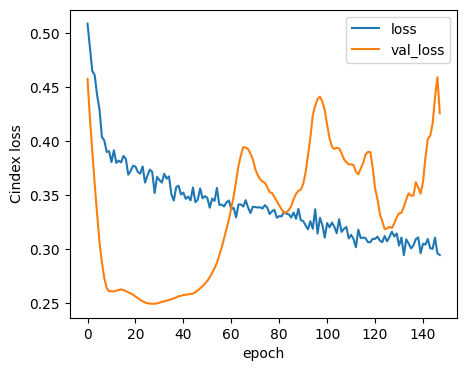

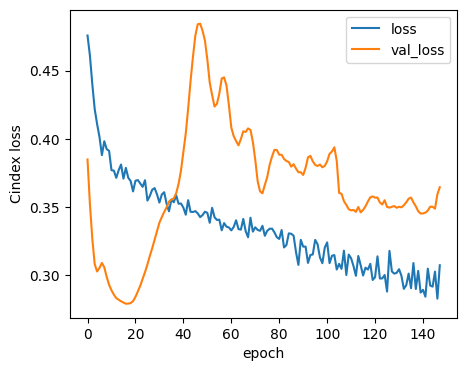

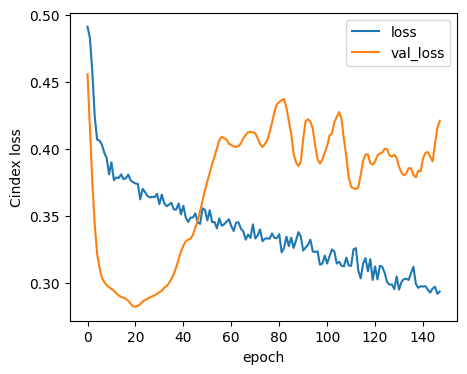

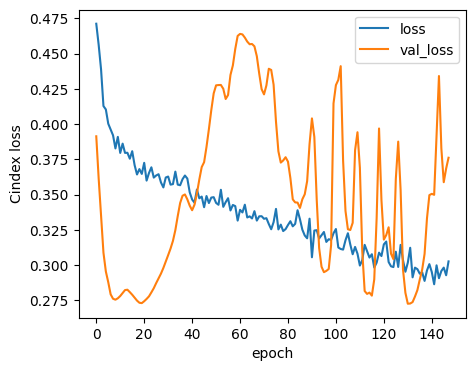

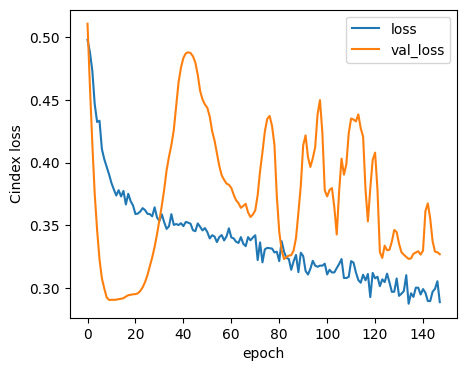

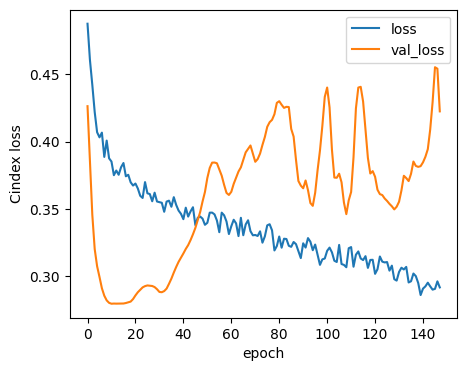

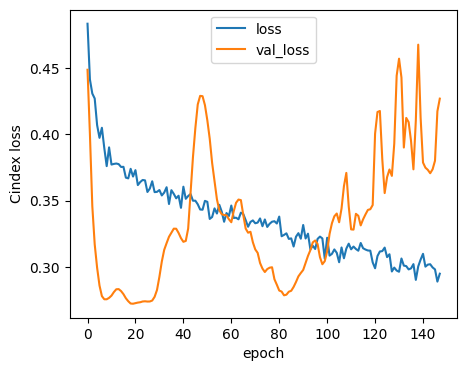

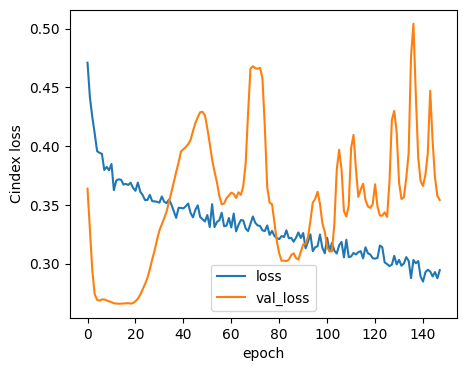

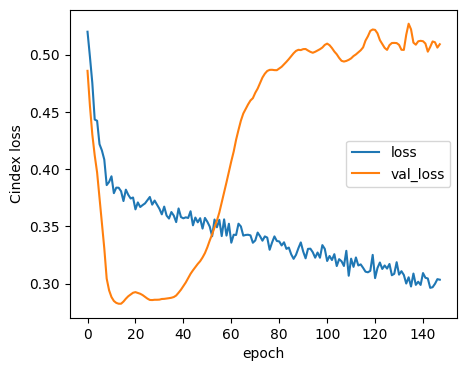

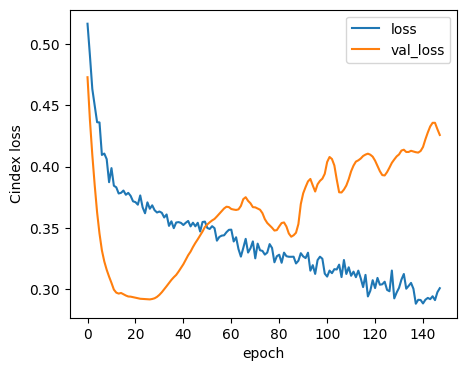

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
best_es = []
for i in range(repetitions):
    dfh = pd.read_csv("./results/TransferLearningSurvival_all/model.E002000.h5/fold-%s_id-%s/history.csv" % (i,i), index_col=0)
    fig, ax=plt.subplots(figsize=(5,4))
    dfh[['loss', 'val_loss']].plot(ax=ax)
    ax.set_ylabel('Cindex loss')
    
    best_e1 = dfh.val_loss.idxmin()
    best_e2 = dfh.val_sigmoid_concordance.idxmax()
    best_es.append(best_e1)
    #best_es.append(best_e2)
    
best_epoch = pd.DataFrame(best_es)[0].median()